Keypoints Coordinates and Confidence

In [2]:
import os
import sys
import argparse
import cv2
import time
import torch
from vidgear.gears import CamGear
import numpy as np

# HRNet Directory
sys.path.append(os.path.abspath('simple-HigherHRNet'))

# Import the required HRNet model classes and utilities
from SimpleHigherHRNet import SimpleHigherHRNet
from misc.visualization import draw_points, draw_skeleton, draw_points_and_skeleton, joints_dict, check_video_rotation
from misc.utils import find_person_id_associations

Image loaded successfully.


C:\Users\rensl\Documents\Final_Project\simple-HigherHRNet\SimpleHigherHRNet.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, ma

device: 'cuda' - 1 GPU(s) will be used
Model initialized successfully.
Joints structure: [[[8.32729492e+01 3.91931152e+02 8.63854051e-01]
  [7.66010742e+01 3.99437012e+02 8.79369140e-01]
  [7.53500977e+01 3.87761230e+02 8.64477694e-01]
  [7.45161133e+01 4.14865723e+02 8.41718078e-01]
  [7.32651367e+01 3.82340332e+02 1.54345613e-02]
  [9.11958008e+01 4.34047363e+02 6.95154667e-01]
  [1.14964355e+02 3.90680176e+02 5.05285978e-01]
  [1.39566895e+02 4.48642090e+02 7.45539367e-01]
  [1.57080566e+02 4.34047363e+02 7.01111197e-01]
  [1.63335449e+02 4.89924316e+02 5.25369167e-01]
  [1.63335449e+02 4.80333496e+02 6.86844826e-01]
  [2.00447754e+02 4.34047363e+02 5.31019211e-01]
  [2.07536621e+02 3.99854004e+02 5.17342806e-01]
  [2.80093262e+02 4.71576660e+02 7.27359891e-01]
  [2.77591309e+02 4.10278809e+02 6.20918989e-01]
  [3.08031738e+02 4.37800293e+02 7.29038954e-01]
  [3.71831543e+02 4.22371582e+02 5.45002580e-01]]]
Detected joints for 1 people.

Person 1:
Keypoints:
Joint 0: (83.27, 391.93)

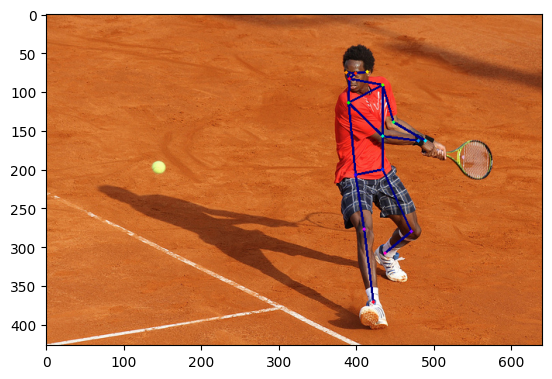

In [3]:
import cv2
import torch
from SimpleHigherHRNet import SimpleHigherHRNet
from misc.visualization import draw_points_and_skeleton, joints_dict
import matplotlib.pyplot as plt

# Load the image
image_path = "data/coco/images/test2017/000000000057.jpg"
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    raise ValueError(f"Image at path '{image_path}' could not be loaded. Please check the path.")

print("Image loaded successfully.")

# Initialize the model
model = SimpleHigherHRNet(
    c=32,
    nof_joints=17,
    checkpoint_path="simple-HigherHRNet/weights/pose_higher_hrnet_w32_512.pth",
    resolution=512,
    return_bounding_boxes=False,
    max_nof_people=30,
    max_batch_size=16,
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
)

print("Model initialized successfully.")

# Perform pose estimation
joints = model.predict(image)

# Print the structure of joints to understand its format
print("Joints structure:", joints)

# Proceed based on the structure of joints
if len(joints) == 0:
    print("No joints detected.")
else:
    print(f"Detected joints for {len(joints)} people.")
    
    # Extract and print keypoints and confidence scores
    for person_index, person_data in enumerate(joints):
        print(f"\nPerson {person_index + 1}:")
        keypoints = person_data[:, :2]  # Extract x, y coordinates
        confidences = person_data[:, 2]  # Extract confidence scores
        
        print("Keypoints:")
        for i, (x, y) in enumerate(keypoints):
            print(f"Joint {i}: ({x:.2f}, {y:.2f})")

        print("Confidence scores:")
        for i, confidence in enumerate(confidences):
            print(f"Joint {i}: {confidence:.2f}")
    
    # Draw the keypoints and skeleton on the image
    skeleton = joints_dict()['coco']['skeleton']
    if len(joints) > 0:
        image = draw_points_and_skeleton(image, joints[0], skeleton, points_color_palette='gist_rainbow', skeleton_color_palette='jet')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image with keypoints and skeleton
cv2.imshow("Pose Estimation", image)
plt.imshow(image_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
joints.shape

(1, 17, 3)